# Problem Statement

CarDekho.com is India’s leading car search venture that helps users buy cars that are right for them. It’s website and app carry rich automotive content such as expert reviews, detailed specs and prices, comparisons as well as videos and pictures of all car brands and models available in India.

We have the sales data of all the cars sold during the time frame of 1983 to 2020. We are going to analyse this data set in order to help them expand their business, gain and retain customers, and stand out the competitions they face.

The used car market in India is a dynamic and ever-changing landscape. Prices can fluctuate wildly based on a variety of factors including the make and model of the car, its mileage, its condition and the current market conditions. As a result, it can be difficult for sellers to accurately price their cars.

The data set has 8128 data points with 13 features in it related to :

Car Details - Car name, transmission, fuel type, number of seats, year of manufacturing.

Engine Details - Mileage, Engine type, Torque, Maximum power in BHP.

Sale Details - Selling price, kilometers driven by the car.

In [1]:
# Importing Required Libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
import io
%cd "C:\one drive chandu\OneDrive\Documents\PG 32 Machine Learning\Folder"

C:\one drive chandu\OneDrive\Documents\PG 32 Machine Learning\Folder


In [3]:
df=pd.read_csv('Car details v3.csv')

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8128 entries, 0 to 8127
Data columns (total 13 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   name           8128 non-null   object 
 1   year           8128 non-null   int64  
 2   selling_price  8128 non-null   int64  
 3   km_driven      8128 non-null   int64  
 4   fuel           8128 non-null   object 
 5   seller_type    8128 non-null   object 
 6   transmission   8128 non-null   object 
 7   owner          8128 non-null   object 
 8   mileage        7907 non-null   object 
 9   engine         7907 non-null   object 
 10  max_power      7913 non-null   object 
 11  torque         7906 non-null   object 
 12  seats          7907 non-null   float64
dtypes: float64(1), int64(3), object(9)
memory usage: 825.6+ KB


In [5]:
df.head()

,name,year,selling_price,km_driven,fuel,seller_type,transmission,owner,mileage,engine,max_power,torque,seats
0,Maruti Swift Dzire VDI,2014,450000,145500,Diesel,Individual,Manual,First Owner,23.4 kmpl,1248 CC,74 bhp,190Nm@ 2000rpm,5.0
1,Skoda Rapid 1.5 TDI Ambition,2014,370000,120000,Diesel,Individual,Manual,Second Owner,21.14 kmpl,1498 CC,103.52 bhp,250Nm@ 1500-2500rpm,5.0
2,Honda City 2017-2020 EXi,2006,158000,140000,Petrol,Individual,Manual,Third Owner,17.7 kmpl,1497 CC,78 bhp,"12.7@ 2,700(kgm@ rpm)",5.0
3,Hyundai i20 Sportz Diesel,2010,225000,127000,Diesel,Individual,Manual,First Owner,23.0 kmpl,1396 CC,90 bhp,22.4 kgm at 1750-2750rpm,5.0
4,Maruti Swift VXI BSIII,2007,130000,120000,Petrol,Individual,Manual,First Owner,16.1 kmpl,1298 CC,88.2 bhp,"11.5@ 4,500(kgm@ rpm)",5.0


In [6]:
df.tail()

,name,year,selling_price,km_driven,fuel,seller_type,transmission,owner,mileage,engine,max_power,torque,seats
8123,Hyundai i20 Magna,2013,320000,110000,Petrol,Individual,Manual,First Owner,18.5 kmpl,1197 CC,82.85 bhp,113.7Nm@ 4000rpm,5.0
8124,Hyundai Verna CRDi SX,2007,135000,119000,Diesel,Individual,Manual,Fourth & Above Owner,16.8 kmpl,1493 CC,110 bhp,"24@ 1,900-2,750(kgm@ rpm)",5.0
8125,Maruti Swift Dzire ZDi,2009,382000,120000,Diesel,Individual,Manual,First Owner,19.3 kmpl,1248 CC,73.9 bhp,190Nm@ 2000rpm,5.0
8126,Tata Indigo CR4,2013,290000,25000,Diesel,Individual,Manual,First Owner,23.57 kmpl,1396 CC,70 bhp,140Nm@ 1800-3000rpm,5.0
8127,Tata Indigo CR4,2013,290000,25000,Diesel,Individual,Manual,First Owner,23.57 kmpl,1396 CC,70 bhp,140Nm@ 1800-3000rpm,5.0


##  Data Preprocessing

In [7]:
# Finding The Unique ones in the Columns
df.nunique()

name             2058
year               29
selling_price     677
km_driven         921
fuel                4
seller_type         3
transmission        2
owner               5
mileage           393
engine            121
max_power         322
torque            441
seats               9
dtype: int64

In [8]:
df.mileage.head(10)

0     23.4 kmpl
1    21.14 kmpl
2     17.7 kmpl
3     23.0 kmpl
4     16.1 kmpl
5    20.14 kmpl
6    17.3 km/kg
7     16.1 kmpl
8    23.59 kmpl
9     20.0 kmpl
Name: mileage, dtype: object

In [9]:
# Repalcing kmpl with space
df['mileage']=df['mileage'].str.replace('kmpl','')

In [10]:
df['mileage'].head()

0     23.4 
1    21.14 
2     17.7 
3     23.0 
4     16.1 
Name: mileage, dtype: object

In [11]:
# Replacing 'km/kg' with space
df['mileage']=df['mileage'].str.replace('km/kg','')

In [12]:
# Converting it to Float
df['mileage']=df['mileage'].astype('float64')

In [13]:
df['engine'].head()

0    1248 CC
1    1498 CC
2    1497 CC
3    1396 CC
4    1298 CC
Name: engine, dtype: object

In [14]:
# Replacing CC with space in the Engine
df['engine']=df['engine'].str.replace('CC','')

In [15]:
# Converted it to float data type
df['engine']=df['engine'].astype('float64')

In [16]:
# Finding unique values in the max_power
df['max_power'].unique()

array(['74 bhp', '103.52 bhp', '78 bhp', '90 bhp', '88.2 bhp',
       '81.86 bhp', '57.5 bhp', '37 bhp', '67.1 bhp', '68.1 bhp',
       '108.45 bhp', '60 bhp', '73.9 bhp', nan, '67 bhp', '82 bhp',
       '88.5 bhp', '46.3 bhp', '88.73 bhp', '64.1 bhp', '98.6 bhp',
       '88.8 bhp', '83.81 bhp', '83.1 bhp', '47.3 bhp', '73.8 bhp',
       '34.2 bhp', '35 bhp', '81.83 bhp', '40.3 bhp', '121.3 bhp',
       '138.03 bhp', '160.77 bhp', '117.3 bhp', '116.3 bhp', '83.14 bhp',
       '67.05 bhp', '168.5 bhp', '100 bhp', '120.7 bhp', '98.63 bhp',
       '175.56 bhp', '103.25 bhp', '171.5 bhp', '100.6 bhp', '174.33 bhp',
       '187.74 bhp', '170 bhp', '78.9 bhp', '88.76 bhp', '86.8 bhp',
       '108.495 bhp', '108.62 bhp', '93.7 bhp', '103.6 bhp', '98.59 bhp',
       '189 bhp', '67.04 bhp', '68.05 bhp', '58.2 bhp', '82.85 bhp',
       '81.80 bhp', '73 bhp', '120 bhp', '94.68 bhp', '160 bhp', '65 bhp',
       '155 bhp', '69.01 bhp', '126.32 bhp', '138.1 bhp', '83.8 bhp',
       '126.2 bhp', '98.

In [17]:
# Replacing the space with the space
df['max_power']=df['max_power'].str.replace(' ',"")

In [18]:
df['max_power']=df['max_power'].str.replace('','')

In [19]:
df['max_power']=df['max_power'].replace(regex=True,to_replace='^[0-9]',value='')

In [20]:
df.max_power.head()

0        4bhp
1    03.52bhp
2        8bhp
3        0bhp
4      8.2bhp
Name: max_power, dtype: object

In [21]:
# Replacing bhp using space
df['max_power']=df['max_power'].str.replace('bhp','')

In [22]:
df.max_power.head()

0        4
1    03.52
2        8
3        0
4      8.2
Name: max_power, dtype: object

In [23]:
df.name

0             Maruti Swift Dzire VDI
1       Skoda Rapid 1.5 TDI Ambition
2           Honda City 2017-2020 EXi
3          Hyundai i20 Sportz Diesel
4             Maruti Swift VXI BSIII
                    ...             
8123               Hyundai i20 Magna
8124           Hyundai Verna CRDi SX
8125          Maruti Swift Dzire ZDi
8126                 Tata Indigo CR4
8127                 Tata Indigo CR4
Name: name, Length: 8128, dtype: object

In [24]:
# Accesing 1st word from the name and storing in the company
df['Company']=df['name'].str.split(' ').str[0]

In [25]:
df.Company.head()

0     Maruti
1      Skoda
2      Honda
3    Hyundai
4     Maruti
Name: Company, dtype: object

In [26]:
# Dropping the name from the dataset
df.drop('name',axis=1,inplace=True)

In [27]:
df.head()

,year,selling_price,km_driven,fuel,seller_type,transmission,owner,mileage,engine,max_power,torque,seats,Company
0,2014,450000,145500,Diesel,Individual,Manual,First Owner,23.40,1248.0,4,190Nm@ 2000rpm,5.0,Maruti
1,2014,370000,120000,Diesel,Individual,Manual,Second Owner,21.14,1498.0,03.52,250Nm@ 1500-2500rpm,5.0,Skoda
2,2006,158000,140000,Petrol,Individual,Manual,Third Owner,17.70,1497.0,8,"12.7@ 2,700(kgm@ rpm)",5.0,Honda
3,2010,225000,127000,Diesel,Individual,Manual,First Owner,23.00,1396.0,0,22.4 kgm at 1750-2750rpm,5.0,Hyundai
4,2007,130000,120000,Petrol,Individual,Manual,First Owner,16.10,1298.0,8.2,"11.5@ 4,500(kgm@ rpm)",5.0,Maruti


In [28]:
# Value counts of the Company
df['Company'].value_counts(dropna=False)

Company
Maruti           2448
Hyundai          1415
Mahindra          772
Tata              734
Toyota            488
Honda             467
Ford              397
Chevrolet         230
Renault           228
Volkswagen        186
BMW               120
Skoda             105
Nissan             81
Jaguar             71
Volvo              67
Datsun             65
Mercedes-Benz      54
Fiat               47
Audi               40
Lexus              34
Jeep               31
Mitsubishi         14
Force               6
Land                6
Isuzu               5
Kia                 4
Ambassador          4
Daewoo              3
MG                  3
Ashok               1
Opel                1
Peugeot             1
Name: count, dtype: int64

In [29]:
import re

In [30]:
df.torque.head()

0              190Nm@ 2000rpm
1         250Nm@ 1500-2500rpm
2       12.7@ 2,700(kgm@ rpm)
3    22.4 kgm at 1750-2750rpm
4       11.5@ 4,500(kgm@ rpm)
Name: torque, dtype: object

In [31]:
# Extracting the digit and rpm
df['torq']=df['torque'].str.extract('(\d+(rpm))')[0]

In [32]:
# replacing rpm with space
df['torq']=df['torq'].str.replace('rpm','')

In [33]:
df.head()

,year,selling_price,km_driven,fuel,seller_type,transmission,owner,mileage,engine,max_power,torque,seats,Company,torq
0,2014,450000,145500,Diesel,Individual,Manual,First Owner,23.40,1248.0,4,190Nm@ 2000rpm,5.0,Maruti,2000
1,2014,370000,120000,Diesel,Individual,Manual,Second Owner,21.14,1498.0,03.52,250Nm@ 1500-2500rpm,5.0,Skoda,2500
2,2006,158000,140000,Petrol,Individual,Manual,Third Owner,17.70,1497.0,8,"12.7@ 2,700(kgm@ rpm)",5.0,Honda,NaN
3,2010,225000,127000,Diesel,Individual,Manual,First Owner,23.00,1396.0,0,22.4 kgm at 1750-2750rpm,5.0,Hyundai,2750
4,2007,130000,120000,Petrol,Individual,Manual,First Owner,16.10,1298.0,8.2,"11.5@ 4,500(kgm@ rpm)",5.0,Maruti,NaN


In [34]:
# Checking for nulls
df.isnull().sum()

year               0
selling_price      0
km_driven          0
fuel               0
seller_type        0
transmission       0
owner              0
mileage          221
engine           221
max_power        215
torque           222
seats            221
Company            0
torq             796
dtype: int64

In [35]:
df.info()
#We can see some are in Object  data type

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8128 entries, 0 to 8127
Data columns (total 14 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   year           8128 non-null   int64  
 1   selling_price  8128 non-null   int64  
 2   km_driven      8128 non-null   int64  
 3   fuel           8128 non-null   object 
 4   seller_type    8128 non-null   object 
 5   transmission   8128 non-null   object 
 6   owner          8128 non-null   object 
 7   mileage        7907 non-null   float64
 8   engine         7907 non-null   float64
 9   max_power      7913 non-null   object 
 10  torque         7906 non-null   object 
 11  seats          7907 non-null   float64
 12  Company        8128 non-null   object 
 13  torq           7332 non-null   object 
dtypes: float64(3), int64(3), object(8)
memory usage: 889.1+ KB


In [36]:
df.columns

Index(['year', 'selling_price', 'km_driven', 'fuel', 'seller_type',
       'transmission', 'owner', 'mileage', 'engine', 'max_power', 'torque',
       'seats', 'Company', 'torq'],
      dtype='object')

In [37]:
# Converting the max_power into numeric
df['max_power']=pd.to_numeric(df['max_power'],errors='coerce')

In [38]:
# Converting the torq into the numeric
df['torq']=pd.to_numeric(df['torq'],errors='coerce')

In [39]:
# Checking max,min,std,median of the numeric data
df[['mileage', 'engine', 'max_power','torq','seats']].describe()

,mileage,engine,max_power,torq,seats
count,7907.000000,7907.000000,7906.000000,7332.000000,7907.000000
mean,19.418783,1458.625016,12.938246,3072.693126,5.416719
std,4.037145,503.916303,19.368718,919.097085,0.959588
min,0.000000,624.000000,0.000000,500.000000,2.000000
25%,16.780000,1197.000000,3.600000,2250.000000,5.000000
50%,19.300000,1248.000000,7.000000,3000.000000,5.000000
75%,22.320000,1582.000000,8.800000,4000.000000,5.000000
max,42.000000,3604.000000,98.500000,5300.000000,14.000000


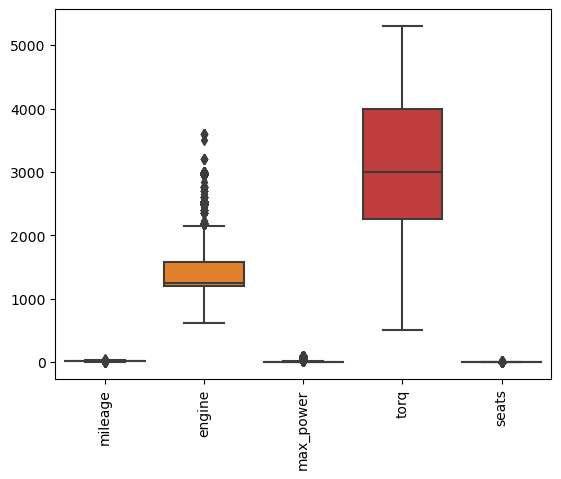

In [40]:
# Checking for the outliers in the data
sns.boxplot(df[['mileage', 'engine', 'max_power','torq','seats']])
plt.xticks(rotation='vertical')
plt.show()

In [41]:
# Replacing the all the nulls with the median
for i in df[['mileage', 'engine', 'max_power','torq','seats']]:
    df[i]=df[i].fillna(df[i].median())

In [42]:
# Creating the new column Age by subtracting the year from the Current Year
df['Age']=2022-df['year']

In [43]:
df['Age'].describe()

count    8128.000000
mean        8.195989
std         4.044249
min         2.000000
25%         5.000000
50%         7.000000
75%        11.000000
max        39.000000
Name: Age, dtype: float64

In [44]:
# dropping the torque and year from dataset
df.drop(['torque','year'],axis=1,inplace=True)

In [45]:
df.head()

,selling_price,km_driven,fuel,seller_type,transmission,owner,mileage,engine,max_power,seats,Company,torq,Age
0,450000,145500,Diesel,Individual,Manual,First Owner,23.40,1248.0,4.00,5.0,Maruti,2000.0,8
1,370000,120000,Diesel,Individual,Manual,Second Owner,21.14,1498.0,3.52,5.0,Skoda,2500.0,8
2,158000,140000,Petrol,Individual,Manual,Third Owner,17.70,1497.0,8.00,5.0,Honda,3000.0,16
3,225000,127000,Diesel,Individual,Manual,First Owner,23.00,1396.0,0.00,5.0,Hyundai,2750.0,12
4,130000,120000,Petrol,Individual,Manual,First Owner,16.10,1298.0,8.20,5.0,Maruti,3000.0,15


In [46]:
df.to_csv('maheshbabu.csv')

##  Data Visulization

In [49]:
import warnings
warnings.filterwarnings('ignore')

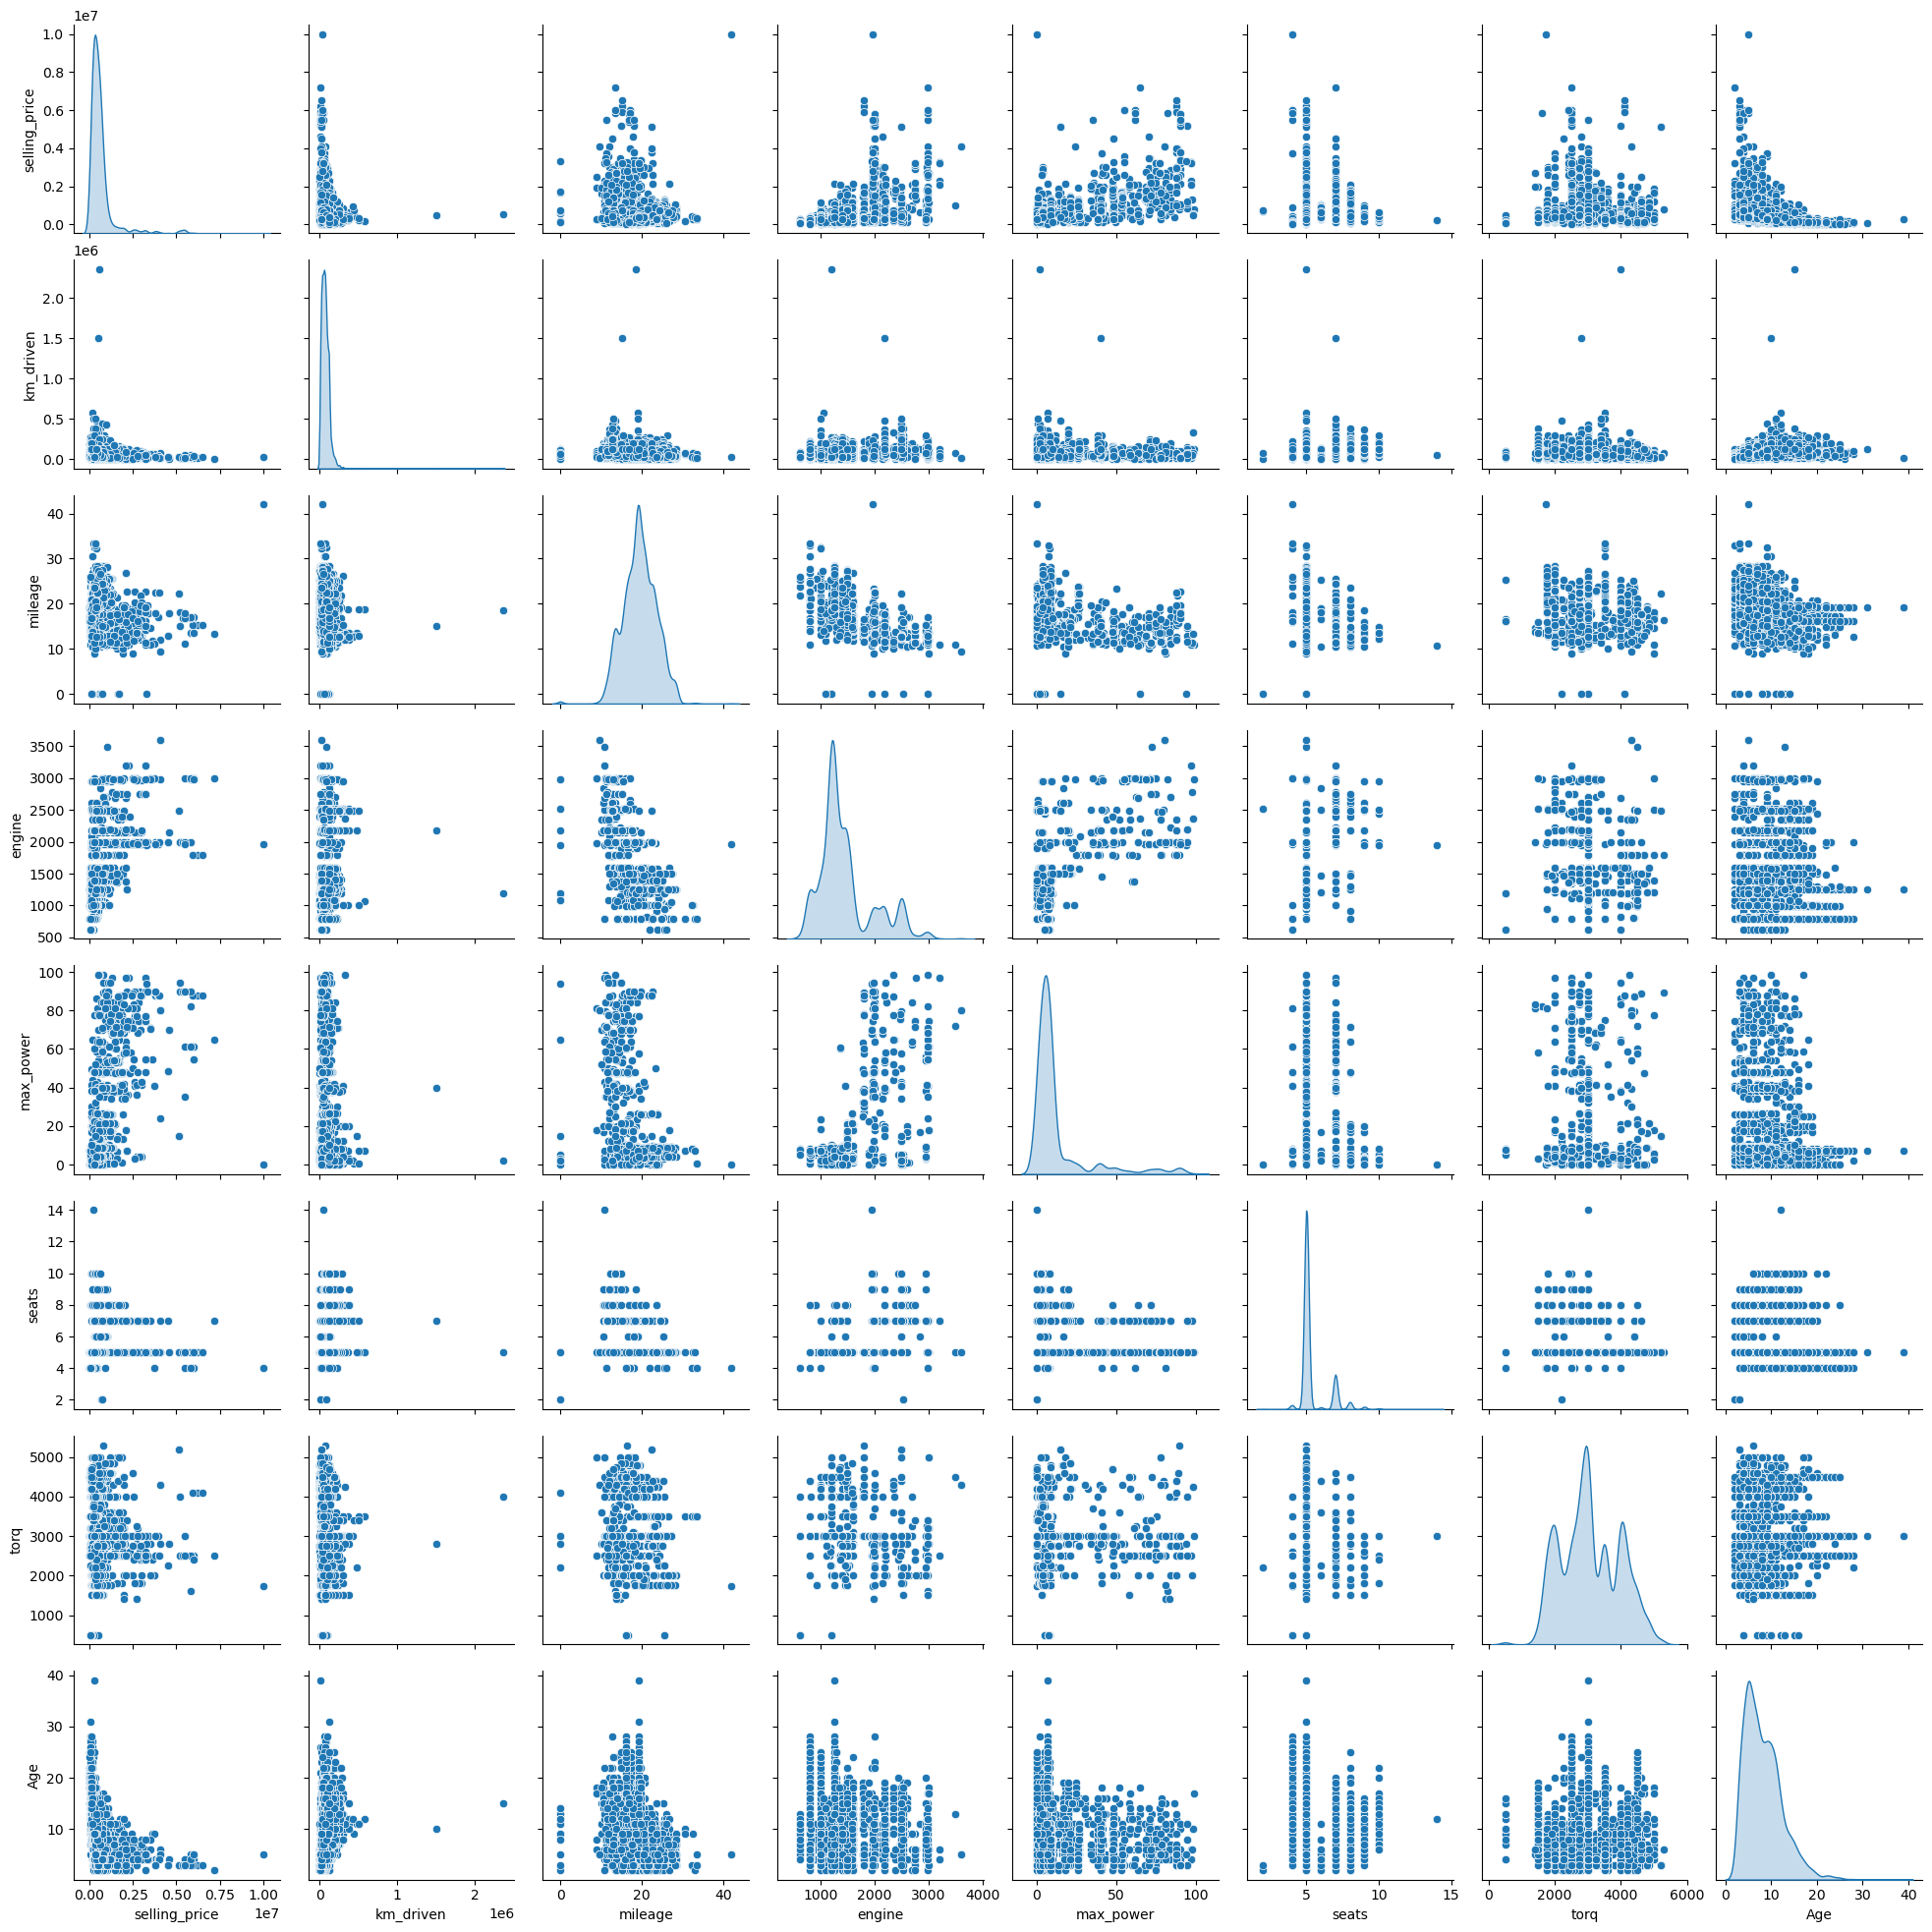

In [50]:
sns.pairplot(df,diag_kind='kde')
plt.show()

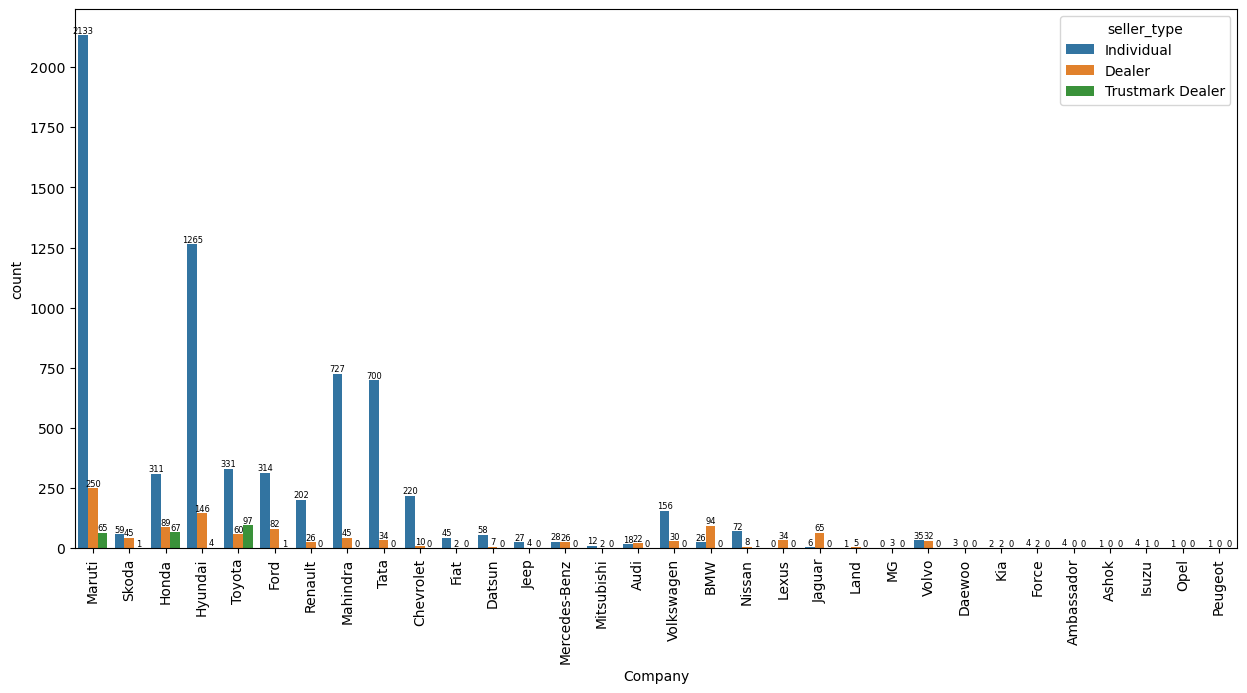

In [56]:
plt.figure(figsize=(15,7))
ax=sns.countplot(x=df.Company,hue=df.seller_type)
for i in ax.containers:
    ax.bar_label(i,fontsize=6)
plt.xticks(rotation='vertical')
plt.show()

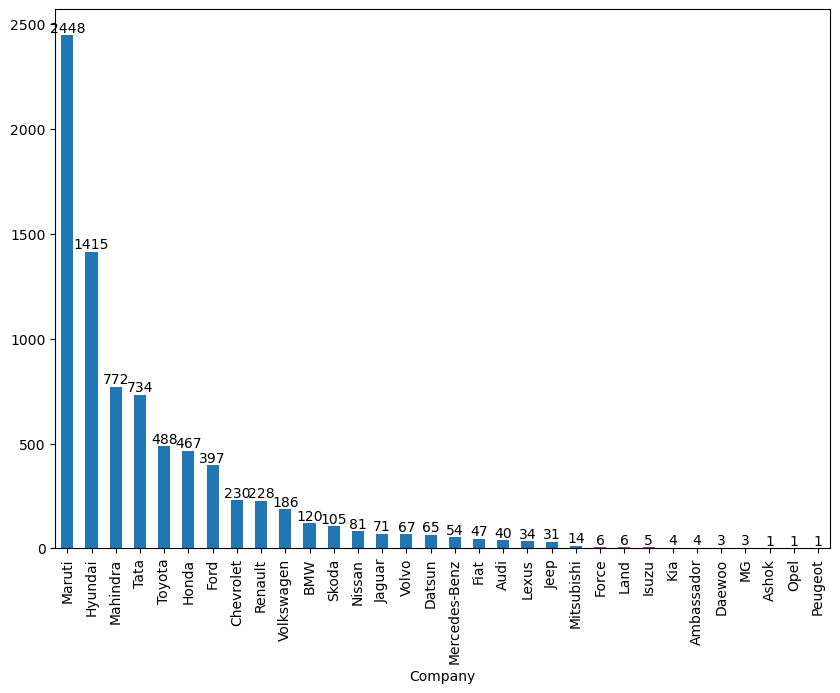

In [517]:
ax=df.Company.value_counts().plot(kind='bar',figsize=(10,7))
for i in ax.containers:
    ax.bar_label(i)
plt.show()

Frequency Counts and Pie Diagram with percentage for variables fuel, seller_type,owner

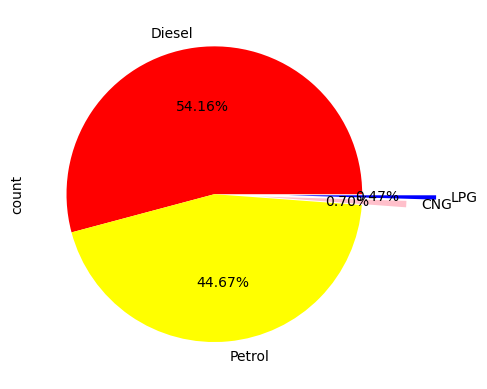

In [518]:
df['fuel'].value_counts().plot(kind='pie',autopct='%.2f%%',explode=[0,0,0.3,0.5],colors=['red','yellow','pink','blue'])
plt.show()

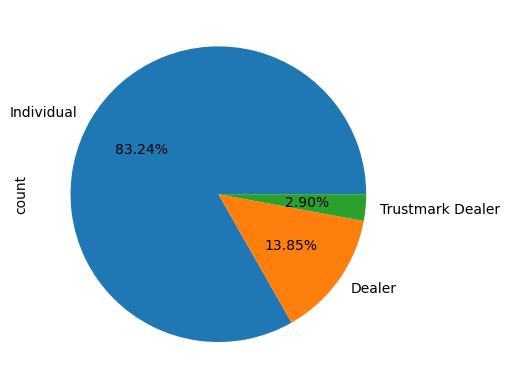

In [519]:
df['seller_type'].value_counts().plot(kind='pie',autopct='%.2f%%')
plt.show()

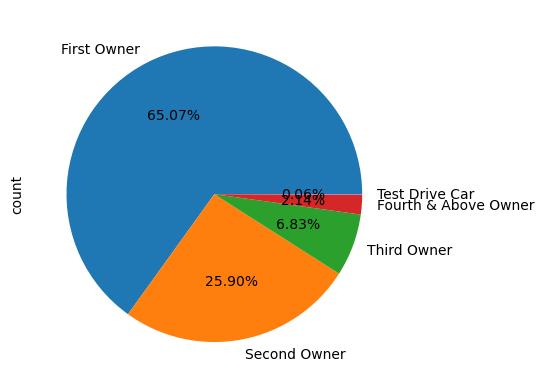

In [520]:
df['owner'].value_counts().plot(kind='pie',autopct='%.2f%%')
plt.show()

Cross Tabulation and Stacked Bar Plot for variables fuel & seller_type, owner & fuel ,companyname & fuel

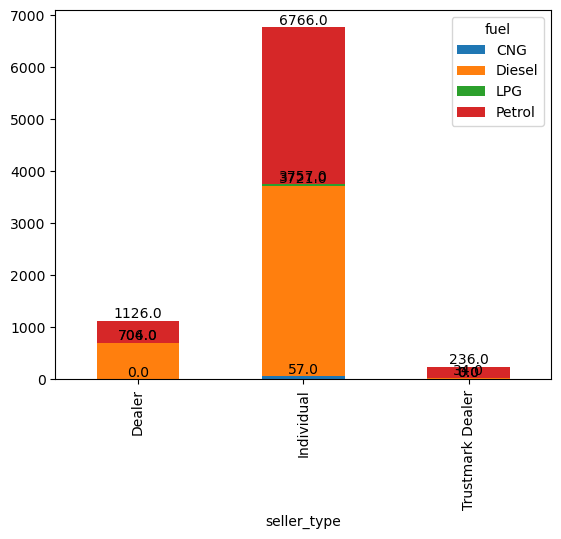

In [60]:
ax=pd.crosstab(df['seller_type'],df['fuel']).plot(kind='bar',stacked=True)
for i in ax.containers:
    ax.bar_label(i,fmt='%0.01f',fontsize=10)

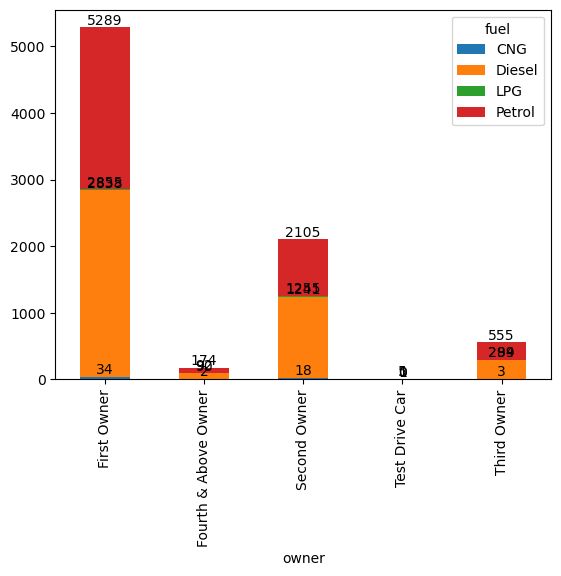

In [522]:
ax=pd.crosstab(df['owner'],df['fuel']).plot(kind='bar',stacked=True)
for i in ax.containers:
    ax.bar_label(i)

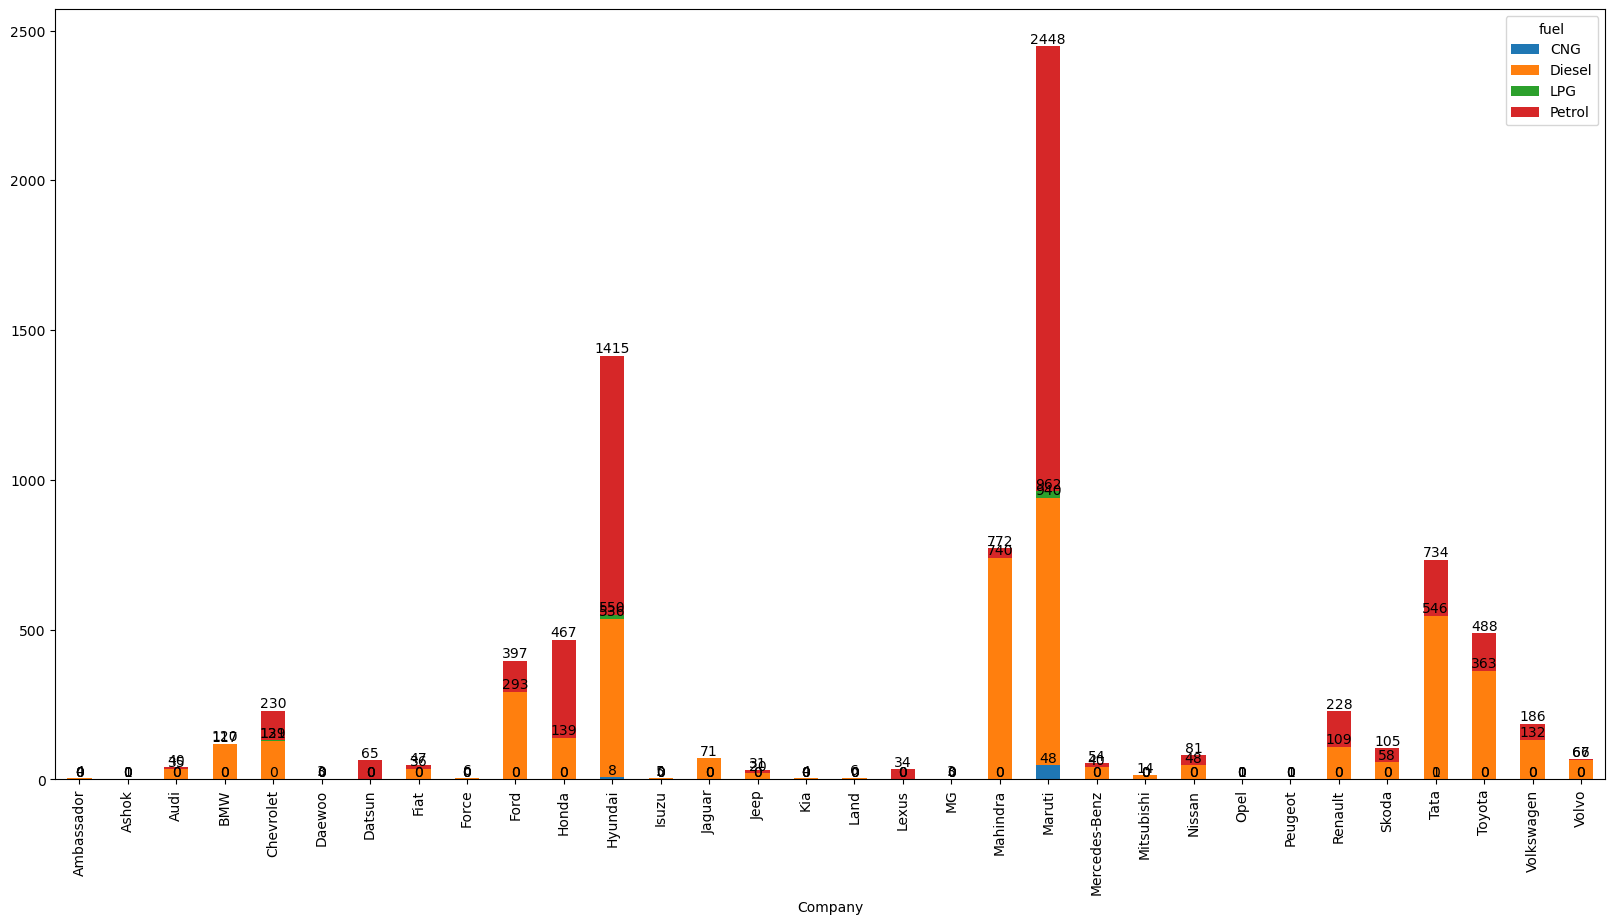

In [523]:
ax=pd.crosstab(df['Company'],df['fuel']).plot(kind='bar',stacked=True,figsize=(20,10))
for i in ax.containers:
    ax.bar_label(i)
plt.show()

In [524]:
import warnings
warnings.filterwarnings('ignore')

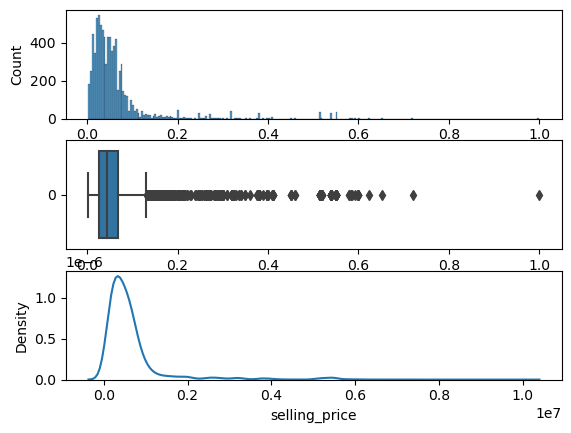

In [525]:
# Understanding Distribution of selling price
fig,ax=plt.subplots(3,1)
sns.histplot(df['selling_price'],ax=ax[0])
sns.boxplot(df['selling_price'],ax=ax[1],orient='h')
sns.kdeplot(df['selling_price'],ax=ax[2])
plt.show()

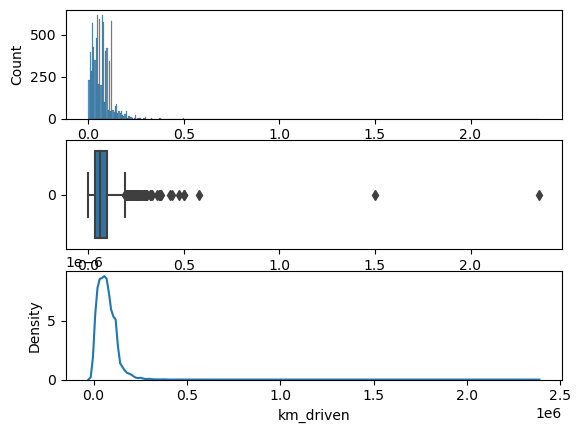

In [526]:
# Understanding the distribution of km_driven
fig,ax=plt.subplots(3,1)
sns.histplot(df['km_driven'],ax=ax[0])
sns.boxplot(df['km_driven'],ax=ax[1],orient='h')
sns.kdeplot(df['km_driven'],ax=ax[2])
plt.show()

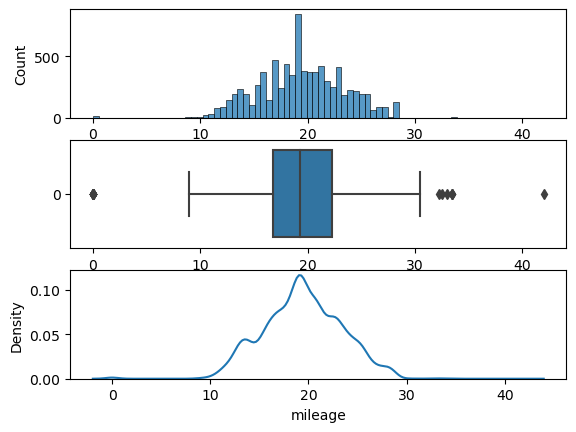

In [527]:
# Understanding the distribution of mileage
fig,ax=plt.subplots(3,1)
sns.histplot(df['mileage'],ax=ax[0])
sns.boxplot(df['mileage'],ax=ax[1],orient='h')
sns.kdeplot(df['mileage'],ax=ax[2])
plt.show()

## Hypothesis testing

#### Ttest

In [528]:
np.round(df['selling_price'].groupby(df['transmission']).mean())

transmission
Automatic    1870828.0
Manual        455426.0
Name: selling_price, dtype: float64

In [529]:
np.round(df['selling_price'].groupby(df['transmission']).var())

transmission
Automatic    2.691349e+12
Manual       8.872370e+10
Name: selling_price, dtype: float64

In [530]:
#H0->mean of automatic is equal to mean of Manual
#Ha->mean of automatic is not equal to mean of Manual

In [531]:
auto=df[df['transmission']=='Automatic']
manual=df[df['transmission']=='Manual']

In [532]:
auto.head()

,selling_price,km_driven,fuel,seller_type,transmission,owner,mileage,engine,max_power,seats,Company,torq,Age
41,2100000,5000,Petrol,Individual,Automatic,First Owner,16.00,1368.0,60.77,5.0,Jeep,2500.0,3
44,675000,23300,Petrol,Dealer,Automatic,First Owner,18.50,1197.0,3.14,5.0,Maruti,4000.0,4
49,1450000,27800,Diesel,Dealer,Automatic,Second Owner,14.80,2143.0,20.70,5.0,Mercedes-Benz,4000.0,8
55,1650000,127700,Diesel,Dealer,Automatic,Second Owner,11.36,2755.0,71.50,7.0,Toyota,3400.0,6
57,1750000,33900,Diesel,Dealer,Automatic,Second Owner,17.68,1968.0,74.33,5.0,Audi,2500.0,9


In [533]:
manual.head()

,selling_price,km_driven,fuel,seller_type,transmission,owner,mileage,engine,max_power,seats,Company,torq,Age
0,450000,145500,Diesel,Individual,Manual,First Owner,23.40,1248.0,4.00,5.0,Maruti,2000.0,8
1,370000,120000,Diesel,Individual,Manual,Second Owner,21.14,1498.0,3.52,5.0,Skoda,2500.0,8
2,158000,140000,Petrol,Individual,Manual,Third Owner,17.70,1497.0,8.00,5.0,Honda,3000.0,16
3,225000,127000,Diesel,Individual,Manual,First Owner,23.00,1396.0,0.00,5.0,Hyundai,2750.0,12
4,130000,120000,Petrol,Individual,Manual,First Owner,16.10,1298.0,8.20,5.0,Maruti,3000.0,15


In [534]:
from scipy.stats import ttest_ind

In [535]:
ttest_ind(auto['selling_price'],manual['selling_price'],equal_var=False)
# Since pvalue=8.531946079710315e-129 is less than 0.05, Reject Null
# Difference in Means is Statistically Significant

TtestResult(statistic=27.888813193478946, pvalue=8.531946079710315e-129, df=1059.2814874514092)

In [536]:
np.round(df['km_driven'].groupby(df['transmission']).mean())

transmission
Automatic    40276.0
Manual       74202.0
Name: km_driven, dtype: float64

In [537]:
np.round(df['km_driven'].groupby(df['transmission']).var())

transmission
Automatic    1.250228e+09
Manual       3.338416e+09
Name: km_driven, dtype: float64

In [538]:
ttest_ind(auto['km_driven'],manual['km_driven'],equal_var=False)
# Since pvalue=2.851791533885484e-131 is less than 0.05, Reject Null

TtestResult(statistic=-26.31311123939943, pvalue=2.851791533885484e-131, df=1998.1925323759576)

In [539]:
# Frame Null and Alternate Hypothesis
# Null - There is no Significant difference in Average mileage of auto & manual cars
# Alt - There is Significant difference in Average mileage of auto & manual cars

In [540]:
np.round(df['mileage'].groupby(df['transmission']).mean())

transmission
Automatic    18.0
Manual       20.0
Name: mileage, dtype: float64

In [541]:
np.round(df['mileage'].groupby(df['transmission']).var())

transmission
Automatic    16.0
Manual       15.0
Name: mileage, dtype: float64

In [542]:
ttest_ind(auto['mileage'],manual['mileage'],equal_var=False)
# Since pvalue=1.924423779471943e-53 is less than 0.05, Reject Null

TtestResult(statistic=-16.08325308774936, pvalue=1.924423779471943e-53, df=1368.3244399399287)

#### ANOVA

In [543]:
# Test Null Average selling_price for different fuel is equal
df.selling_price.groupby(df.fuel).mean()
# More than 2 levels/groups/classes - Anova Single Factor

fuel
CNG       301017.491228
Diesel    791452.921627
LPG       200421.052632
Petrol    462441.061691
Name: selling_price, dtype: float64

In [544]:
cng=df[df['fuel']=="CNG"]
diesel=df[df['fuel']=="Diesel"]
lpg=df[df['fuel']=="LPG"]
petrol=df[df['fuel']=="Petrol"]

In [545]:
cng.head()

,selling_price,km_driven,fuel,seller_type,transmission,owner,mileage,engine,max_power,seats,Company,torq,Age
35,330000,10000,CNG,Individual,Manual,Second Owner,33.44,796.0,0.30,4.0,Maruti,3500.0,3
203,360000,50000,CNG,Individual,Manual,First Owner,26.60,998.0,8.16,5.0,Maruti,3500.0,6
402,409999,35000,CNG,Individual,Manual,First Owner,20.88,1196.0,1.70,5.0,Maruti,3000.0,2
866,165000,60000,CNG,Individual,Manual,Second Owner,30.46,796.0,7.30,5.0,Maruti,3500.0,10
1225,450000,10000,CNG,Individual,Manual,First Owner,21.94,1196.0,1.70,5.0,Maruti,3000.0,3


In [546]:
diesel.head()

,selling_price,km_driven,fuel,seller_type,transmission,owner,mileage,engine,max_power,seats,Company,torq,Age
0,450000,145500,Diesel,Individual,Manual,First Owner,23.40,1248.0,4.00,5.0,Maruti,2000.0,8
1,370000,120000,Diesel,Individual,Manual,Second Owner,21.14,1498.0,3.52,5.0,Skoda,2500.0,8
3,225000,127000,Diesel,Individual,Manual,First Owner,23.00,1396.0,0.00,5.0,Hyundai,2750.0,12
8,350000,90000,Diesel,Individual,Manual,First Owner,23.59,1364.0,7.10,5.0,Toyota,2400.0,11
9,200000,169000,Diesel,Individual,Manual,First Owner,20.00,1399.0,8.10,5.0,Ford,2000.0,9


In [547]:
lpg.head()

,selling_price,km_driven,fuel,seller_type,transmission,owner,mileage,engine,max_power,seats,Company,torq,Age
6,96000,175000,LPG,Individual,Manual,First Owner,17.3,1061.0,7.5,5.0,Maruti,3000.0,15
90,225000,44000,LPG,Dealer,Manual,First Owner,26.2,998.0,8.2,5.0,Maruti,3500.0,12
870,231000,70000,LPG,Individual,Manual,First Owner,26.2,998.0,8.2,5.0,Maruti,3500.0,10
1511,300000,100000,LPG,Individual,Manual,Second Owner,26.2,998.0,8.2,5.0,Maruti,3500.0,10
1658,105000,90000,LPG,Individual,Manual,Second Owner,17.3,1061.0,7.5,5.0,Maruti,3000.0,15


In [548]:
petrol.head()

,selling_price,km_driven,fuel,seller_type,transmission,owner,mileage,engine,max_power,seats,Company,torq,Age
2,158000,140000,Petrol,Individual,Manual,Third Owner,17.70,1497.0,8.00,5.0,Honda,3000.0,16
4,130000,120000,Petrol,Individual,Manual,First Owner,16.10,1298.0,8.20,5.0,Maruti,3000.0,15
5,440000,45000,Petrol,Individual,Manual,First Owner,20.14,1197.0,1.86,5.0,Hyundai,4000.0,5
7,45000,5000,Petrol,Individual,Manual,Second Owner,16.10,796.0,7.00,4.0,Maruti,2500.0,21
11,92000,100000,Petrol,Individual,Manual,Second Owner,17.30,993.0,0.00,5.0,Maruti,4500.0,17


In [549]:
# Frame Null & Alternate
# Null - There is no Significant difference in Average selling_price of different fuel cars
# Alt - There is Significant difference in Average selling_price of different fuel cars

In [550]:
from scipy.stats import f_oneway
f_oneway(cng['selling_price'],diesel['selling_price'],lpg['selling_price'],petrol['selling_price'])
# Since pvalue=7.768067697277526e-78 is less than 0.05, Reject Null

F_onewayResult(statistic=122.88062883888716, pvalue=7.768067697277526e-78)

In [551]:
#test null average mileage of different fuel cars is equal
df['mileage'].groupby(df['fuel']).mean()

fuel
CNG       23.824211
Diesel    19.634607
LPG       18.634211
Petrol    19.088956
Name: mileage, dtype: float64

In [552]:
f_oneway(cng['mileage'],diesel['mileage'],lpg['mileage'],petrol['mileage'])
# Since pvalue=1.218592729218157e-23 is less than 0.05, Reject Null

F_onewayResult(statistic=36.842275392000154, pvalue=1.218592729218157e-23)

#### Chi-Square test

In [553]:
from scipy.stats import chi2_contingency

In [554]:
# Null - There is no Association between both variables
# Alt - There is Association between both variables

In [555]:
chi2_contingency(pd.crosstab(df.transmission,df.fuel))
# Since pvalue=6.801498516561924e-05 is less than 0.05, Reject Null

Chi2ContingencyResult(statistic=21.912764347384904, pvalue=6.801498516561924e-05, dof=3, expected_freq=array([[   7.36343504,  568.66387795,    4.90895669,  469.06373031],
       [  49.63656496, 3833.33612205,   33.09104331, 3161.93626969]]))

In [556]:
chi2_contingency(pd.crosstab(df.fuel,df.seller_type))
# Since pvalue=1.2641980292155646e-40 is less than 0.05, Reject Null

Chi2ContingencyResult(statistic=200.82868982394092, pvalue=1.2641980292155646e-40, dof=6, expected_freq=array([[7.89640748e+00, 4.74485728e+01, 1.65501969e+00],
       [6.09824311e+02, 3.66436171e+03, 1.27813976e+02],
       [5.26427165e+00, 3.16323819e+01, 1.10334646e+00],
       [5.03015010e+02, 3.02255733e+03, 1.05427657e+02]]))

In [557]:
df.columns

Index(['selling_price', 'km_driven', 'fuel', 'seller_type', 'transmission',
       'owner', 'mileage', 'engine', 'max_power', 'seats', 'Company', 'torq',
       'Age'],
      dtype='object')

###  Encoding

In [558]:
df.select_dtypes(include='object')

,fuel,seller_type,transmission,owner,Company
0,Diesel,Individual,Manual,First Owner,Maruti
1,Diesel,Individual,Manual,Second Owner,Skoda
2,Petrol,Individual,Manual,Third Owner,Honda
3,Diesel,Individual,Manual,First Owner,Hyundai
4,Petrol,Individual,Manual,First Owner,Maruti
...,...,...,...,...,...
8123,Petrol,Individual,Manual,First Owner,Hyundai
8124,Diesel,Individual,Manual,Fourth & Above Owner,Hyundai
8125,Diesel,Individual,Manual,First Owner,Maruti
8126,Diesel,Individual,Manual,First Owner,Tata


In [559]:
# Converting the all the objects into the numerical
df=pd.get_dummies(df,columns=['fuel', 'seller_type', 'transmission','owner','seats', 'Company'])

In [560]:
pd.set_option('display.max_columns',62)
df

,selling_price,km_driven,mileage,engine,max_power,torq,Age,fuel_CNG,fuel_Diesel,fuel_LPG,fuel_Petrol,seller_type_Dealer,seller_type_Individual,seller_type_Trustmark Dealer,transmission_Automatic,transmission_Manual,owner_First Owner,owner_Fourth & Above Owner,owner_Second Owner,owner_Test Drive Car,owner_Third Owner,seats_2.0,seats_4.0,seats_5.0,seats_6.0,seats_7.0,seats_8.0,seats_9.0,seats_10.0,seats_14.0,Company_Ambassador,Company_Ashok,Company_Audi,Company_BMW,Company_Chevrolet,Company_Daewoo,Company_Datsun,Company_Fiat,Company_Force,Company_Ford,Company_Honda,Company_Hyundai,Company_Isuzu,Company_Jaguar,Company_Jeep,Company_Kia,Company_Land,Company_Lexus,Company_MG,Company_Mahindra,Company_Maruti,Company_Mercedes-Benz,Company_Mitsubishi,Company_Nissan,Company_Opel,Company_Peugeot,Company_Renault,Company_Skoda,Company_Tata,Company_Toyota,Company_Volkswagen,Company_Volvo
0,450000,145500,23.40,1248.0,4.00,2000.0,8,False,True,False,False,False,True,False,False,True,True,False,False,False,False,False,False,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,True,False,False,False,False,False,False,False,False,False,False,False
1,370000,120000,21.14,1498.0,3.52,2500.0,8,False,True,False,False,False,True,False,False,True,False,False,True,False,False,False,False,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,True,False,False,False,False
2,158000,140000,17.70,1497.0,8.00,3000.0,16,False,False,False,True,False,True,False,False,True,False,False,False,False,True,False,False,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
3,225000,127000,23.00,1396.0,0.00,2750.0,12,False,True,False,False,False,True,False,False,True,True,False,False,False,False,False,False,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
4,130000,120000,16.10,1298.0,8.20,3000.0,15,False,False,False,True,False,True,False,False,True,True,False,False,False,False,False,False,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,True,False,False,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8123,320000,110000,18.50,1197.0,2.85,4000.0,9,False,False,False,True,False,True,False,False,True,True,False,False,False,False,False,False,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
8124,135000,119000,16.80,1493.0,10.00,3000.0,15,False,True,False,False,False,True,False,False,True,False,True,False,False,False,False,False,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
8125,382000,120000,19.30,1248.0,3.90,2000.0,13,False,True,False,False,False,True,False,False,True,True,False,False,False,False,False,False,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,

In [561]:
df.head()

,selling_price,km_driven,mileage,engine,max_power,torq,Age,fuel_CNG,fuel_Diesel,fuel_LPG,fuel_Petrol,seller_type_Dealer,seller_type_Individual,seller_type_Trustmark Dealer,transmission_Automatic,transmission_Manual,owner_First Owner,owner_Fourth & Above Owner,owner_Second Owner,owner_Test Drive Car,owner_Third Owner,seats_2.0,seats_4.0,seats_5.0,seats_6.0,seats_7.0,seats_8.0,seats_9.0,seats_10.0,seats_14.0,Company_Ambassador,Company_Ashok,Company_Audi,Company_BMW,Company_Chevrolet,Company_Daewoo,Company_Datsun,Company_Fiat,Company_Force,Company_Ford,Company_Honda,Company_Hyundai,Company_Isuzu,Company_Jaguar,Company_Jeep,Company_Kia,Company_Land,Company_Lexus,Company_MG,Company_Mahindra,Company_Maruti,Company_Mercedes-Benz,Company_Mitsubishi,Company_Nissan,Company_Opel,Company_Peugeot,Company_Renault,Company_Skoda,Company_Tata,Company_Toyota,Company_Volkswagen,Company_Volvo
0,450000,145500,23.40,1248.0,4.00,2000.0,8,False,True,False,False,False,True,False,False,True,True,False,False,False,False,False,False,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,True,False,False,False,False,False,False,False,False,False,False,False
1,370000,120000,21.14,1498.0,3.52,2500.0,8,False,True,False,False,False,True,False,False,True,False,False,True,False,False,False,False,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,True,False,False,False,False
2,158000,140000,17.70,1497.0,8.00,3000.0,16,False,False,False,True,False,True,False,False,True,False,False,False,False,True,False,False,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
3,225000,127000,23.00,1396.0,0.00,2750.0,12,False,True,False,False,False,True,False,False,True,True,False,False,False,False,False,False,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
4,130000,120000,16.10,1298.0,8.20,3000.0,15,False,False,False,True,False,True,False,False,True,True,False,False,False,False,False,False,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,True,False,False,False,False,False,False,False,False,False,False,False


In [562]:
df.columns

Index(['selling_price', 'km_driven', 'mileage', 'engine', 'max_power', 'torq',
       'Age', 'fuel_CNG', 'fuel_Diesel', 'fuel_LPG', 'fuel_Petrol',
       'seller_type_Dealer', 'seller_type_Individual',
       'seller_type_Trustmark Dealer', 'transmission_Automatic',
       'transmission_Manual', 'owner_First Owner',
       'owner_Fourth & Above Owner', 'owner_Second Owner',
       'owner_Test Drive Car', 'owner_Third Owner', 'seats_2.0', 'seats_4.0',
       'seats_5.0', 'seats_6.0', 'seats_7.0', 'seats_8.0', 'seats_9.0',
       'seats_10.0', 'seats_14.0', 'Company_Ambassador', 'Company_Ashok',
       'Company_Audi', 'Company_BMW', 'Company_Chevrolet', 'Company_Daewoo',
       'Company_Datsun', 'Company_Fiat', 'Company_Force', 'Company_Ford',
       'Company_Honda', 'Company_Hyundai', 'Company_Isuzu', 'Company_Jaguar',
       'Company_Jeep', 'Company_Kia', 'Company_Land', 'Company_Lexus',
       'Company_MG', 'Company_Mahindra', 'Company_Maruti',
       'Company_Mercedes-Benz', 'Company

### Checking for the Multi-collinearity

In [563]:
k=df[['selling_price', 'km_driven', 'mileage', 'engine', 'max_power', 'torq',
       'Age']].corr()

In [564]:
k

,selling_price,km_driven,mileage,engine,max_power,torq,Age
selling_price,1.000000,-0.225534,-0.125040,0.458345,0.696803,-0.026574,-0.414092
km_driven,-0.225534,1.000000,-0.171746,0.198911,-0.072904,-0.225604,0.418006
mileage,-0.125040,-0.171746,1.000000,-0.574128,-0.325595,-0.173322,-0.311657
engine,0.458345,0.198911,-0.574128,1.000000,0.527950,-0.201131,-0.035851
max_power,0.696803,-0.072904,-0.325595,0.527950,1.000000,-0.063911,-0.154537
torq,-0.026574,-0.225604,-0.173322,-0.201131,-0.063911,1.000000,-0.099360
Age,-0.414092,0.418006,-0.311657,-0.035851,-0.154537,-0.099360,1.000000


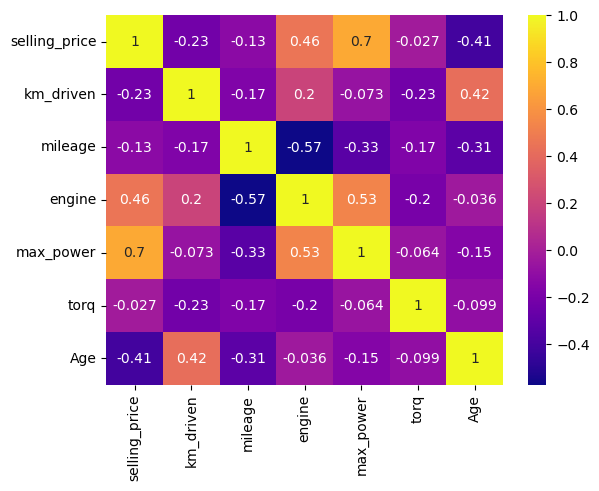

In [566]:
sns.heatmap(k,annot=True,cmap='plasma')
plt.show()
# From this plot we can say that there are no co-related featuresbb

###  Splitting the data

In [567]:
x=df.drop('selling_price',axis=1)
y=df['selling_price']

In [568]:
x.head()

,km_driven,mileage,engine,max_power,torq,Age,fuel_CNG,fuel_Diesel,fuel_LPG,fuel_Petrol,seller_type_Dealer,seller_type_Individual,seller_type_Trustmark Dealer,transmission_Automatic,transmission_Manual,owner_First Owner,owner_Fourth & Above Owner,owner_Second Owner,owner_Test Drive Car,owner_Third Owner,seats_2.0,seats_4.0,seats_5.0,seats_6.0,seats_7.0,seats_8.0,seats_9.0,seats_10.0,seats_14.0,Company_Ambassador,Company_Ashok,Company_Audi,Company_BMW,Company_Chevrolet,Company_Daewoo,Company_Datsun,Company_Fiat,Company_Force,Company_Ford,Company_Honda,Company_Hyundai,Company_Isuzu,Company_Jaguar,Company_Jeep,Company_Kia,Company_Land,Company_Lexus,Company_MG,Company_Mahindra,Company_Maruti,Company_Mercedes-Benz,Company_Mitsubishi,Company_Nissan,Company_Opel,Company_Peugeot,Company_Renault,Company_Skoda,Company_Tata,Company_Toyota,Company_Volkswagen,Company_Volvo
0,145500,23.40,1248.0,4.00,2000.0,8,False,True,False,False,False,True,False,False,True,True,False,False,False,False,False,False,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,True,False,False,False,False,False,False,False,False,False,False,False
1,120000,21.14,1498.0,3.52,2500.0,8,False,True,False,False,False,True,False,False,True,False,False,True,False,False,False,False,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,True,False,False,False,False
2,140000,17.70,1497.0,8.00,3000.0,16,False,False,False,True,False,True,False,False,True,False,False,False,False,True,False,False,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
3,127000,23.00,1396.0,0.00,2750.0,12,False,True,False,False,False,True,False,False,True,True,False,False,False,False,False,False,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
4,120000,16.10,1298.0,8.20,3000.0,15,False,False,False,True,False,True,False,False,True,True,False,False,False,False,False,False,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,True,False,False,False,False,False,False,False,False,False,False,False


In [569]:
y.head()

0    450000
1    370000
2    158000
3    225000
4    130000
Name: selling_price, dtype: int64

In [570]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test=train_test_split(x,y,test_size=0.2)

In [571]:
X_train.shape,X_test.shape,y_train.shape,y_test.shape

((6502, 61), (1626, 61), (6502,), (1626,))

##  Model Building

### Linear Regression

In [572]:
from sklearn.linear_model import LinearRegression
model=LinearRegression()
model.fit(x,y)

LinearRegression()

In [573]:
model.score(x,y)

0.850806105527495

In [574]:
model.intercept_

1598984.3084030244

In [575]:
pred=model.predict(x)

In [576]:
pred

array([451258.02554762, 435455.91254758,  36632.56707085, ...,
       227973.41829588, 263302.64337267, 263302.64337267])

###  Error

In [577]:
residual=y-pred

In [578]:
residual

0        -1258.025548
1       -65455.912548
2       121367.432929
3       -17685.875164
4        30664.062394
            ...      
8123     19956.456116
8124    -77916.996058
8125    154026.581704
8126     26697.356627
8127     26697.356627
Name: selling_price, Length: 8128, dtype: float64

###  Rmse

In [579]:
np.sqrt(np.mean(residual**2))

311401.2623142381

In [580]:
print('skewness',y.skew())
print('Kurtosis',y.kurt())

skewness 4.193533440675855
Kurtosis 21.081289012186755


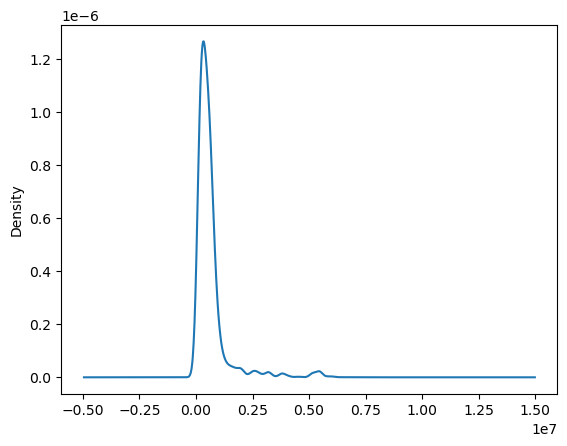

In [582]:
y.plot(kind='density')
plt.show()

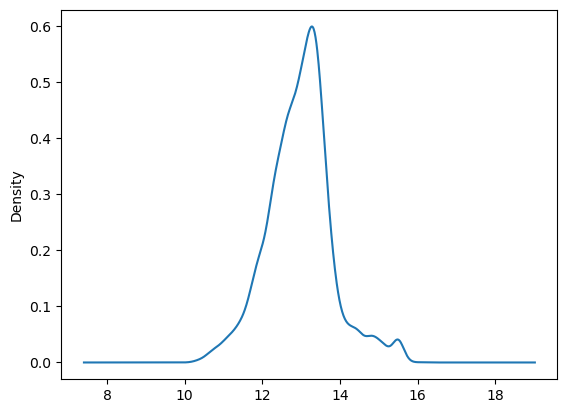

In [583]:
np.log(y).plot(kind='density')
plt.show()

In [584]:
Y=np.log(df['selling_price'])

In [585]:
model2=LinearRegression().fit(x,Y)

In [586]:
model2.score(x,Y)

0.8914139609505269

In [587]:
pred2=model2.predict(x)

In [588]:
pred2

array([12.96583995, 13.00258333, 11.88911528, ..., 12.40083546,
       12.50393484, 12.50393484])

In [589]:
pred2=np.exp(pred2)

In [590]:
residual2=y-pred2

In [689]:
print(' Mean-Squared-Error:-',np.mean(residual2**2))
print(' Root Mean-Squared Error:-',np.sqrt(np.mean(residual2**2)))
print(' Mean-absolute Error:-',mean_absolute_error(y,pred2))

 Mean-Squared-Error:- 47967196654.59603
 Root Mean-Squared Error:- 219014.14715628768
 Mean-absolute Error:- 114720.34881665488


####  Decision Tree

In [637]:
from sklearn.tree import DecisionTreeRegressor
dt=DecisionTreeRegressor(max_depth=7).fit(x,y)

In [638]:
dt.score(x,y)

0.9487063131314817

In [639]:
pred3=dt.predict(x)

In [640]:
resid=y-pred3

In [687]:
print(' Mean-Squared-Error:-',np.mean(resid**2))
print(' Root Mean-Squared Error:-',np.sqrt(np.mean(resid**2)))
print(' Mean-absolute Error:-',mean_absolute_error(y,pred3))

 Mean-Squared-Error:- 33339079371.062485
 Root Mean-Squared Error:- 182589.92132936168
 Mean-absolute Error:- 118376.78241210282


#####  Cross -validation

In [642]:
from sklearn.model_selection import cross_val_score
cv=cross_val_score(dt,x,y)

In [643]:
cv

array([0.87433409, 0.89419199, 0.94135156, 0.9184857 , 0.86897564])

In [644]:
cv.mean()

0.8994677946344589

###  Hyper parameter tuning

In [645]:
from sklearn.model_selection import GridSearchCV

In [646]:
dt1=DecisionTreeRegressor()

In [647]:
d={'criterion':["squared_error", "friedman_mse", "absolute_error"],'max_depth':[5,6,7,8],'min_samples_leaf': [5, 10, 20, 50, 100]}

In [648]:
gscv_dt1=GridSearchCV(dt1,param_grid=d,cv=10,n_jobs=-1)

In [649]:
gscv_dt1.fit(x,y)

GridSearchCV(cv=10, estimator=DecisionTreeRegressor(), n_jobs=-1,
             param_grid={'criterion': ['squared_error', 'friedman_mse',
                                       'absolute_error'],
                         'max_depth': [5, 6, 7, 8],
                         'min_samples_leaf': [5, 10, 20, 50, 100]})

In [654]:
gscv_dt1.best_estimator_

DecisionTreeRegressor(max_depth=8, min_samples_leaf=10)

In [650]:
gscv_dt1.best_params_

{'criterion': 'squared_error', 'max_depth': 8, 'min_samples_leaf': 10}

In [651]:
gscv_dt1.best_score_

0.9072873948565585

In [663]:
dt2=DecisionTreeRegressor(criterion='squared_error',max_depth= 8,min_samples_leaf=10)

In [664]:
dt2.fit(x,y)

DecisionTreeRegressor(max_depth=8, min_samples_leaf=10)

In [665]:
dt2.score(x,y)

0.9288200940883174

###  Random Forest

In [656]:
from sklearn.ensemble import RandomForestRegressor
rf=RandomForestRegressor().fit(x,y)

In [657]:
rf.score(x,y)

0.9925213192197779

#####  Cross -validation

In [658]:
from sklearn.model_selection import cross_val_score
cv=cross_val_score(rf,x,y)

In [659]:
cv.mean()

0.9465183682891845

In [666]:
pred4=rf.predict(x)

In [667]:
residual3=y-pred4

In [688]:
print('Mean-Squared Error:-',np.mean(residual3**2))
print('Root Mean Squared Error:-',np.sqrt(np.mean(residual3**2)))
print('Mean Absolute Error:-',mean_absolute_error(y,pred4))

Mean-Squared Error:- 4860877572.746537
Root Mean Squared Error:- 69719.99406731571
Mean Absolute Error:- 26553.282456141045


## Auto -ML

In [679]:
from lazypredict.Supervised import LazyRegressor

In [680]:
X_train,x_test,Y_train,y_test=train_test_split(x,y,test_size=.5,random_state=123)

In [681]:
clf=LazyRegressor(verbose=0,ignore_warnings=True,custom_metric=None)
models,predictions=clf.fit(X_train,x_test,Y_train,y_test)

print(models)

100%|██████████████████████████████████████████████████████████████████████████████████| 42/42 [00:34<00:00,  1.20it/s]

[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000827 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 808
[LightGBM] [Info] Number of data points in the train set: 4064, number of used features: 6
[LightGBM] [Info] Start training from score 635570.211368
                               Adjusted R-Squared  R-Squared        RMSE  \
Model                                                                      
ExtraTreesRegressor                          0.95       0.95   177263.90   
XGBRegressor                                 0.95       0.95   181372.80   
HistGradientBoostingRegressor                0.94       0.94   203928.98   
LGBMRegressor                                0.93       0.93   207436.31   
KNeighborsRegressor                          0.93       0.93   211898.55   
GradientBoostingRegressor                    0.93       0.93   212936.88   
RandomForestRegressor                        0.9

### Conclusion

In this summary, I will present the results of our machine learning project on the Car Dekho  dataset, which contains the information about the sales  data of all the cars sold during the time frame of 1983 to 2020. Our goal was to build and evaluate different machine learning models that can predict the selling price of a car given its features and the characteristics. We used various regression techniques, such as linear regression, decision tree, random forest,and compared their performance using two metrics: mean absolute error(MAE) and root mean squared error (RMSE).

MAE measures the average absolute differences between the predicted values and the actual values, while RMSE measures how far the predictions are from the actual sales values. A higher accuracy score and a lower RMSE indicates better model performance.

    MODEL                          R_Square Score            MAE                        RMSE

    Linear Regression            0.8914139609505269        114720.348816654           219014.14715628768

    Decision Tree                0.9487063131314817        118376.78241210282         182589.92132936168

    Random Forest                0.9925213192197779        26553.282456141045          69719.99406731571

 

By comparing these regression metrics, The lower MAE and MSE, coupled with a higher R-squared, collectively demonstrate the project's achievement in accurately predicting and optimizing continuous variables, particularly in the context of car pricing within the Car Dekho platform.


In the above models Random forest produces the lower MAE and lower RMSE and produces and higher R2_squared score,
Therefore, we recommend using the Random Forest model for predicting the selling price of The cars in the Car Dekh0 dataset, as it has the lowest RMSE and thus the highest predictive power among the models we tested. 